In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f9bca8b8ecc37386e54a0e69b20e1e4c


In [17]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [20]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | apucarana
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | demba
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | ndele
Processing Record 7 of Set 1 | kruisfontein
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | galesong
Processing Record 10 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 1 | haapu
City not found. Skipping...
Processing Record 12 of Set 1 | lephepe
City not found. Skipping...
Processing Record 13 of Set 1 | maniitsoq
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | groningen
Processing Record 17 of Set 1 | berlevag
Processing Record 18 of Set 1 | mehamn
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | mahebourg
Pr

Processing Record 37 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 38 of Set 4 | tautira
Processing Record 39 of Set 4 | tasiilaq
Processing Record 40 of Set 4 | roros
Processing Record 41 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | nchelenge
Processing Record 46 of Set 4 | flinders
Processing Record 47 of Set 4 | sept-iles
Processing Record 48 of Set 4 | aktau
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | lengshuijiang
Processing Record 1 of Set 5 | malakal
Processing Record 2 of Set 5 | geraldton
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | lalsot
Processing Record 5 of Set 5 | sosva
Processing Record 6 of Set 5 | xining
Processing Record 7 of Set 5 | catamarca
Processing Record 8 of Set 5 | parry sound
Processing Record 9 of Set 5 | amderma
City

Processing Record 27 of Set 8 | port dover
Processing Record 28 of Set 8 | marzuq
Processing Record 29 of Set 8 | codrington
Processing Record 30 of Set 8 | shimoda
Processing Record 31 of Set 8 | yamada
Processing Record 32 of Set 8 | elko
Processing Record 33 of Set 8 | chapais
Processing Record 34 of Set 8 | nalut
Processing Record 35 of Set 8 | wewak
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | vila velha
Processing Record 38 of Set 8 | gizo
Processing Record 39 of Set 8 | alice springs
Processing Record 40 of Set 8 | ulenje
Processing Record 41 of Set 8 | thakurgaon
Processing Record 42 of Set 8 | upington
Processing Record 43 of Set 8 | sosnovo-ozerskoye
Processing Record 44 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 45 of Set 8 | ardakan
Processing Record 46 of Set 8 | roald
Processing Record 47 of Set 8 | hue
Processing Record 48 of Set 8 | labe
Processing Record 49 of Set 8 | hirara
Processing Record 50 of Set 8 | ves

Processing Record 17 of Set 12 | kapuskasing
Processing Record 18 of Set 12 | arinos
Processing Record 19 of Set 12 | shubarshi
Processing Record 20 of Set 12 | derbent
Processing Record 21 of Set 12 | bridlington
Processing Record 22 of Set 12 | artyk
City not found. Skipping...
Processing Record 23 of Set 12 | kavant
City not found. Skipping...
Processing Record 24 of Set 12 | rio grande
Processing Record 25 of Set 12 | orcopampa
Processing Record 26 of Set 12 | alenquer
Processing Record 27 of Set 12 | rabo de peixe
Processing Record 28 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 29 of Set 12 | analipsis
Processing Record 30 of Set 12 | ortigueira
Processing Record 31 of Set 12 | namangan
Processing Record 32 of Set 12 | college
Processing Record 33 of Set 12 | graham
Processing Record 34 of Set 12 | beihai
Processing Record 35 of Set 12 | amahai
Processing Record 36 of Set 12 | khamaria
Processing Record 37 of Set 12 | yichun
Processing Record 38 of Set 12 |

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Apucarana,-23.5508,-51.4608,71.73,85,0,10.13,BR,2022-03-23 01:31:34
1,Yellowknife,62.4560,-114.3525,13.41,65,100,12.66,CA,2022-03-23 01:31:34
2,Demba,-5.5100,22.2667,66.16,94,100,1.52,CD,2022-03-23 01:31:35
3,Hilo,19.7297,-155.0900,80.33,72,40,6.91,US,2022-03-23 01:27:12
4,Hermanus,-34.4187,19.2345,71.80,88,100,12.66,ZA,2022-03-23 01:31:35
5,Ndele,8.4109,20.6473,77.68,38,100,6.73,CF,2022-03-23 01:31:36
6,Kruisfontein,-34.0033,24.7314,65.88,92,0,3.29,ZA,2022-03-23 01:31:36
7,Busselton,-33.6500,115.3333,67.24,47,2,12.50,AU,2022-03-23 01:31:36
8,Galesong,-5.3166,119.3661,80.62,73,100,4.29,ID,2022-03-23 01:31:37
9,Maniitsoq,65.4167,-52.9000,-3.78,95,43,8.28,GL,2022-03-23 01:31:38


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Apucarana,BR,2022-03-23 01:31:34,-23.5508,-51.4608,71.73,85,0,10.13
1,Yellowknife,CA,2022-03-23 01:31:34,62.4560,-114.3525,13.41,65,100,12.66
2,Demba,CD,2022-03-23 01:31:35,-5.5100,22.2667,66.16,94,100,1.52
3,Hilo,US,2022-03-23 01:27:12,19.7297,-155.0900,80.33,72,40,6.91
4,Hermanus,ZA,2022-03-23 01:31:35,-34.4187,19.2345,71.80,88,100,12.66
5,Ndele,CF,2022-03-23 01:31:36,8.4109,20.6473,77.68,38,100,6.73
6,Kruisfontein,ZA,2022-03-23 01:31:36,-34.0033,24.7314,65.88,92,0,3.29
7,Busselton,AU,2022-03-23 01:31:36,-33.6500,115.3333,67.24,47,2,12.50
8,Galesong,ID,2022-03-23 01:31:37,-5.3166,119.3661,80.62,73,100,4.29
9,Maniitsoq,GL,2022-03-23 01:31:38,65.4167,-52.9000,-3.78,95,43,8.28


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

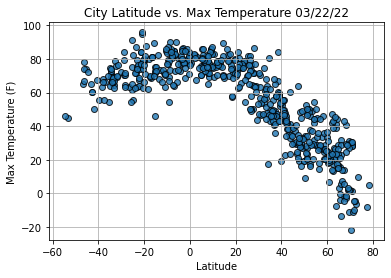

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

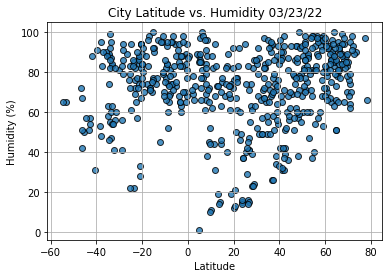

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

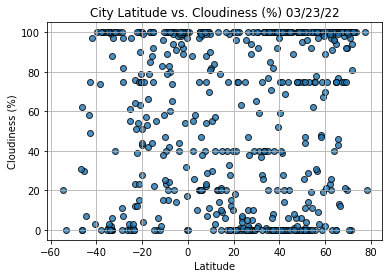

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

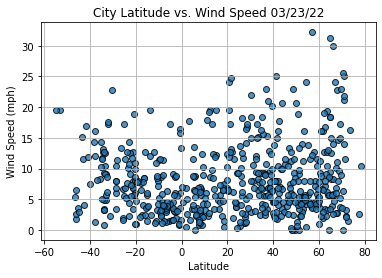

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()